# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 6: *FourierConvolution*
Compute the matching of a template in an image by using Fourier convolutions
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageF, plotImageF
from FourierUtilities import  computeCoefficients, reconstruction
from ImagePropertiesUtilities import imageMaxMin
from PrintUtilities import printText
from PlotUtilities import plot3DHistogram 

# Iteration
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    templateName = Input template image name
    addQuadraticTerm = Set to true to add the square term so that is equivalent to SSD

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter6/Input/")
imageName = "Eye.png"
templateName = "EyeTemplate.png"
addQuadraticTerm = True

### Read image and create template

In [3]:
inputImage, width, height = imageReadL(pathToDir + imageName)

# Create template
templateImage, widthTemplate, heightTemplate = imageReadL(pathToDir + templateName)

# We pad the input and template to this size
widthPad = width + widthTemplate - 1
heightPad = height + heightTemplate - 1    

# Pad input 
inputPad = createImageF(widthPad, heightPad)
for x,y in itertools.product(range(0, width), range(0, height)):
    inputPad[y,x] = inputImage[y,x] 

# Pad and invert template
templatePad = createImageF(widthPad, heightPad)
templatePadFlip = createImageF(widthPad, heightPad)
for x,y in itertools.product(range(0, widthTemplate), range(0, heightTemplate)):
    templatePad[y,x] = templateImage[y, x]
    templatePadFlip[y,x] = templateImage[heightTemplate-y-1, widthTemplate-x-1]

### Show input image and template

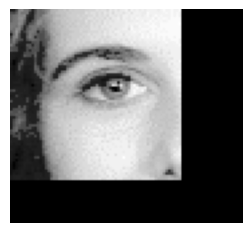

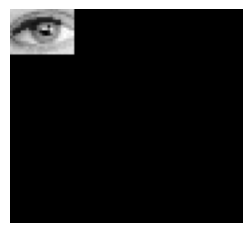

In [4]:
plotImageF(inputPad, figureSize = 3)
plotImageF(templatePad, figureSize = 3) 

### Compute correlation in image domain sum of square differences 

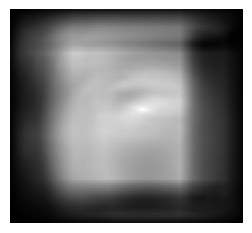

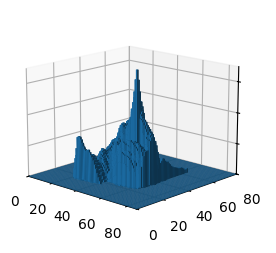

In [8]:
squaredTerm = createImageF(widthPad, heightPad)
corrImage = createImageF(widthPad, heightPad)
for x,y in itertools.product(range(0, widthPad), range(0, heightPad)):
    for w,h in itertools.product(range(-widthTemplate+1,1),                         \
                                 range(-heightTemplate+1,1)):
        p, q = x+w, y+h
        if p >=0 and q>=  0 and p < width and q < height:  
            squaredTerm[y,x] += inputPad[q,p] * inputPad[q,p]
            corrImage[y,x] += 2.0 * templatePad[h+heightTemplate-1,w+widthTemplate-1] * inputPad[q,p]
                    
if addQuadraticTerm:   
    for x,y in itertools.product(range(0, widthPad), range(0, heightPad)): 
        corrImage[y,x] += -squaredTerm[y,x]    
    
plotImageF(corrImage, figureSize = 3) 
maxima, minima = imageMaxMin(corrImage) 
plot3DHistogram(corrImage, [2*(minima+maxima)/3, maxima], [15, -47], False)

### Compute Fourier coefficients 

In [9]:
imageCoeff, maxFrequencyW, maxFrequencyH = computeCoefficients(inputPad) 
templateCoeff, _, _ = computeCoefficients(templatePadFlip)

# Frequency domain multiplication defines convolution is space domain
resultCoeff = createImageF(1 + 2 * maxFrequencyW ,1 + 2 * maxFrequencyH , 2)
for kw, kh in itertools.product(range(-maxFrequencyW, maxFrequencyW + 1),         \
                                range(-maxFrequencyH, maxFrequencyH + 1)):
    w = kw + maxFrequencyW 
    h = kh + maxFrequencyH
    resultCoeff[h,w][0] = (imageCoeff[h,w][0] * templateCoeff[h,w][0] -           \
                           imageCoeff[h,w][1] * templateCoeff[h,w][1])
    resultCoeff[h,w][1] = (imageCoeff[h,w][1] * templateCoeff[h,w][0] +           \
                           imageCoeff[h,w][0] * templateCoeff[h,w][1])
                                  

0 / 86  .. 1 / 86  .. 2 / 86  .. 3 / 86  .. 4 / 86  .. 5 / 86  .. 6 / 86  .. 7 / 86  .. 8 / 86  .. 9 / 86  .. 10 / 86  .. 11 / 86  .. 12 / 86  .. 13 / 86  .. 14 / 86  .. 15 / 86  .. 16 / 86  .. 17 / 86  .. 18 / 86  .. 19 / 86  .. 20 / 86  .. 21 / 86  .. 22 / 86  .. 23 / 86  .. 24 / 86  .. 25 / 86  .. 26 / 86  .. 27 / 86  .. 28 / 86  .. 29 / 86  .. 30 / 86  .. 31 / 86  .. 32 / 86  .. 33 / 86  .. 34 / 86  .. 35 / 86  .. 36 / 86  .. 37 / 86  .. 38 / 86  .. 39 / 86  .. 40 / 86  .. 41 / 86  .. 42 / 86  .. 43 / 86  .. 44 / 86  .. 45 / 86  .. 46 / 86  .. 47 / 86  .. 48 / 86  .. 49 / 86  .. 50 / 86  .. 51 / 86  .. 52 / 86  .. 53 / 86  .. 54 / 86  .. 55 / 86  .. 56 / 86  .. 57 / 86  .. 58 / 86  .. 59 / 86  .. 60 / 86  .. 61 / 86  .. 62 / 86  .. 63 / 86  .. 64 / 86  .. 65 / 86  .. 66 / 86  .. 67 / 86  .. 68 / 86  .. 69 / 86  .. 70 / 86  .. 71 / 86  .. 72 / 86  .. 73 / 86  .. 74 / 86  .. 75 / 86  .. 76 / 86  .. 77 / 86  .. 78 / 86  .. 79 / 86  .. 80 / 86  .. 81 / 86  .. 82 / 86  .. 83 / 86  .. 84

### Inverse Fourier transform 

In [10]:
reconstructedResult = reconstruction(resultCoeff)

0 / 85  .. 1 / 85  .. 2 / 85  .. 3 / 85  .. 4 / 85  .. 5 / 85  .. 6 / 85  .. 7 / 85  .. 8 / 85  .. 9 / 85  .. 10 / 85  .. 11 / 85  .. 12 / 85  .. 13 / 85  .. 14 / 85  .. 15 / 85  .. 16 / 85  .. 17 / 85  .. 18 / 85  .. 19 / 85  .. 20 / 85  .. 21 / 85  .. 22 / 85  .. 23 / 85  .. 24 / 85  .. 25 / 85  .. 26 / 85  .. 27 / 85  .. 28 / 85  .. 29 / 85  .. 30 / 85  .. 31 / 85  .. 32 / 85  .. 33 / 85  .. 34 / 85  .. 35 / 85  .. 36 / 85  .. 37 / 85  .. 38 / 85  .. 39 / 85  .. 40 / 85  .. 41 / 85  .. 42 / 85  .. 43 / 85  .. 44 / 85  .. 45 / 85  .. 46 / 85  .. 47 / 85  .. 48 / 85  .. 49 / 85  .. 50 / 85  .. 51 / 85  .. 52 / 85  .. 53 / 85  .. 54 / 85  .. 55 / 85  .. 56 / 85  .. 57 / 85  .. 58 / 85  .. 59 / 85  .. 60 / 85  .. 61 / 85  .. 62 / 85  .. 63 / 85  .. 64 / 85  .. 65 / 85  .. 66 / 85  .. 67 / 85  .. 68 / 85  .. 69 / 85  .. 70 / 85  .. 71 / 85  .. 72 / 85  .. 73 / 85  .. 74 / 85  .. 75 / 85  .. 76 / 85  .. 77 / 85  .. 78 / 85  .. 79 / 85  .. 80 / 85  .. 81 / 85  .. 82 / 85  .. 83 / 85  .. 84

### Show convolution 

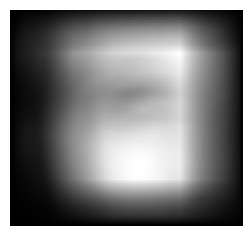

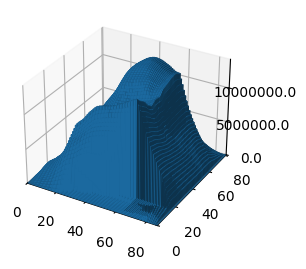

In [13]:
plotImageF(reconstructedResult, figureSize = 3) 
maxima, minima = imageMaxMin(reconstructedResult)
plot3DHistogram(reconstructedResult, [minima, maxima])

### Add square term to define an operator equivalent to SSD

In [14]:
if addQuadraticTerm:
    for x,y in itertools.product(range(0, widthPad), range(0, heightPad)):  
        reconstructedResult[y,x] = -squaredTerm[y,x] + 2.0 * reconstructedResult[y,x]
else:
    for x,y in itertools.product(range(0, widthPad), range(0, heightPad)):  
        reconstructedResult[y,x] = 2.0 * reconstructedResult[y,x]

### Show convolution added the quadratic image term

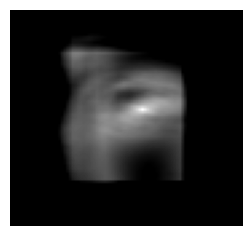

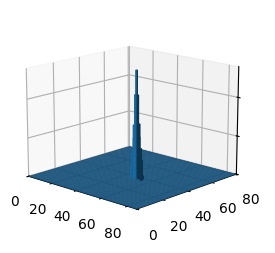

In [17]:
plotImageF(reconstructedResult, figureSize = 3) 
maxima, minima = imageMaxMin(reconstructedResult) 
plot3DHistogram(reconstructedResult, [2*(minima+maxima)/3, maxima], [15, -47], False)